# Aswathi Ajith

## Feature Engineering and Modelling

### Import packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
%matplotlib inline
from datetime import datetime
sns.set(color_codes=True)

### Load data

In [3]:
clean_df = pd.read_csv("final_churn_df.csv")
clean_df.drop(columns ='Unnamed: 0', inplace=True)
clean_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_off_peak,price_peak,price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14605 non-null  object 
 1   channel_sales                   14605 non-null  object 
 2   cons_12m                        14605 non-null  int64  
 3   cons_gas_12m                    14605 non-null  int64  
 4   cons_last_month                 14605 non-null  int64  
 5   date_activ                      14605 non-null  object 
 6   date_end                        14605 non-null  object 
 7   date_modif_prod                 14605 non-null  object 
 8   date_renewal                    14605 non-null  object 
 9   forecast_cons_12m               14605 non-null  float64
 10  forecast_cons_year              14605 non-null  int64  
 11  forecast_discount_energy        14605 non-null  float64
 12  forecast_meter_rent_12m         

### Change the data type of the date column

In [5]:
clean_df['date_activ'] = pd.to_datetime(clean_df['date_activ'], format="%Y-%m-%d")
clean_df['date_end'] = pd.to_datetime(clean_df['date_end'], format="%Y-%m-%d")
clean_df['date_modif_prod'] = pd.to_datetime(clean_df['date_modif_prod'], format="%Y-%m-%d")
clean_df['date_renewal'] = pd.to_datetime(clean_df['date_renewal'], format="%Y-%m-%d")

In [6]:
clean_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [7]:
clean_df.shape

(14605, 53)

## Feature engineering



In [8]:
price_df = pd.read_csv("Downloads/price_data (1).csv")

In [9]:
price_df.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [10]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format="%Y-%m-%d")

In [11]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [12]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

#### To measure how much off-peak energy costs changed between these months for each customer,

In [13]:
price_by_id_monthly = price_df.groupby(['id','price_date']).agg({'price_off_peak_var':'mean','price_off_peak_fix':'mean'}).reset_index()
price_by_id_monthly.head(5)

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885


### 1. Difference between off-peak prices in December and preceding January

In [15]:
jan_prices = price_by_id_monthly.groupby('id').first().reset_index() # gives the first entry of the cutomer
dec_prices =  price_by_id_monthly.groupby('id').last().reset_index() # gives the last entry of the cutomer
dec_prices.head(5)

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930


#### Now, to get the difference of the price values



In [16]:
# We have to merge both January and December prices

In [17]:
difference_df = pd.merge(dec_prices.rename(columns={'price_off_peak_var':'dec_var','price_off_peak_fix':'dec_fix'}), jan_prices.drop(columns='price_date'), on='id')
difference_df.rename(columns={'price_off_peak_var':'jan_var','price_off_peak_fix':'jan_fix'}, inplace=True)
difference_df.columns

Index(['id', 'price_date', 'dec_var', 'dec_fix', 'jan_var', 'jan_fix'], dtype='object')

#### Take difference between the energy and power for months of Jan and Dec

In [18]:
difference_df['off_peak_jan_dec_energy'] = difference_df['dec_var'] - difference_df['jan_var']
difference_df['off_peak_jan_dec_power'] = difference_df['dec_fix'] - difference_df['jan_fix']

In [19]:
difference_df.head(5)

,id,price_date,dec_var,dec_fix,jan_var,jan_fix,off_peak_jan_dec_energy,off_peak_jan_dec_power
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931,-0.003994,-0.000001


In [20]:
difference_final_df = difference_df[['id','off_peak_jan_dec_energy','off_peak_jan_dec_power']]
difference_final_df.head(5)

,id,off_peak_jan_dec_energy,off_peak_jan_dec_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [21]:
clean_df.shape

(14605, 53)

In [22]:
difference_final_df.shape

(16096, 3)

In [23]:
clean_df = pd.merge(clean_df,difference_final_df,on='id')
clean_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_off_peak,price_peak,price_mid_peak,churn,off_peak_jan_dec_energy,off_peak_jan_dec_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


In [24]:
clean_df.shape

(14605, 55)

-----------

Till now, the steps that have been done is,

Monthly price calculation by id: It groups the price data by `id` (company) and `price_date` (monthly date) and calculates the mean of the off-peak prices (`price_off_peak_var` and `price_off_peak_fix`) for each month.

Extract January and December prices: It extracts the first price for January (earliest date) and the last price for December (latest date) for each company.

Price difference calculation: It calculates the price difference between December and January for energy (`price_off_peak_var`) and power (`price_off_peak_fix`).

Merging with churn data: The diff (price difference) is merged with `clean_df` based on the id to associate the price differences with the churn data.

-------

Now, what has to be done is,

Mean prices per period: It computes the average price for each period (off-peak, peak, mid-peak) for each company.

Calculating price differences between consecutive periods: It calculates the mean price difference between consecutive periods (off-peak vs peak, peak vs mid-peak) for both variable and fixed prices.

Merging new features: These price differences are added to the churn_df dataset, enriching the data with more features for prediction.

### 2. Aggregate average prices per period by company
Average price changes across periods

In [25]:
mean_period_prices = price_df.groupby(['id']).agg({'price_off_peak_var' : 'mean','price_peak_var' : 'mean',
                                                  'price_mid_peak_var' : 'mean','price_off_peak_fix' : 'mean',
                                                  'price_peak_fix' : 'mean','price_mid_peak_fix' : 'mean'})

In [26]:
# mean difference between consecutive periods

mean_period_prices['off_peak_peak_var_mean_diff'] = mean_period_prices['price_off_peak_var'] - mean_period_prices['price_peak_var']
mean_period_prices['peak_mid_peak_var_mean_diff'] = mean_period_prices['price_peak_var'] - mean_period_prices['price_mid_peak_var']
mean_period_prices['off_peak_mid_peak_var_mean_diff'] = mean_period_prices['price_off_peak_var'] - mean_period_prices['price_mid_peak_var']
mean_period_prices['off_peak_peak_fix_mean_diff'] = mean_period_prices['price_off_peak_fix'] - mean_period_prices['price_peak_fix']
mean_period_prices['peak_mid_peak_fix_mean_diff'] = mean_period_prices['price_peak_fix'] - mean_period_prices['price_mid_peak_fix']
mean_period_prices['off_peak_mid_peak_fix_mean_diff'] = mean_period_prices['price_off_peak_fix'] - mean_period_prices['price_mid_peak_fix']

In [27]:
mean_period_prices_final = mean_period_prices[['off_peak_peak_var_mean_diff','peak_mid_peak_var_mean_diff','off_peak_mid_peak_var_mean_diff','off_peak_peak_fix_mean_diff','peak_mid_peak_fix_mean_diff','off_peak_mid_peak_fix_mean_diff']]
mean_period_prices_final.head(5)

,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
0010ee3855fdea87602a5b7aba8e42de,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930


In [28]:
clean_df = pd.merge(clean_df,mean_period_prices_final,on='id')

In [29]:
clean_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak,churn,off_peak_jan_dec_energy,off_peak_jan_dec_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [30]:
clean_df.shape

(14605, 61)

### 3. Max price changes across periods and months

 What we need is the max price change across periods. 
 
 - For this we first has to filter the datasets by months
 
 - Then, take thse difference of the price values by periods of those months
 
 - Then maximize the values

In [31]:
# Aggregate average prices per period by company
max_price_by_months = price_df.groupby('id').agg({'price_off_peak_var':'mean','price_peak_var':'mean','price_mid_peak_var':'mean',
                                                 'price_off_peak_fix':'mean','price_peak_fix':'mean','price_mid_peak_fix':'mean'}).reset_index()

In [32]:
max_price_by_months.head(5)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [33]:
# mean difference between consecutive periods

max_price_by_months['off_peak_peak_var_mean_diff'] = max_price_by_months['price_off_peak_var'] - max_price_by_months['price_peak_var']
max_price_by_months['peak_mid_peak_var_mean_diff'] = max_price_by_months['price_peak_var'] - max_price_by_months['price_mid_peak_var']
max_price_by_months['off_peak_mid_peak_var_mean_diff'] = max_price_by_months['price_off_peak_var'] - max_price_by_months['price_mid_peak_var']
max_price_by_months['off_peak_peak_fix_mean_diff'] = max_price_by_months['price_off_peak_fix'] - max_price_by_months['price_peak_fix']
max_price_by_months['peak_mid_peak_fix_mean_diff'] = max_price_by_months['price_peak_fix'] - max_price_by_months['price_mid_peak_fix']
max_price_by_months['off_peak_mid_peak_fix_mean_diff'] = max_price_by_months['price_off_peak_fix'] - max_price_by_months['price_mid_peak_fix']

In [34]:
# maximum monthly difference across time periods
max_diff_across_periods_months = max_price_by_months.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(columns={'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'})

In [35]:
max_diff_across_periods_months_final = max_diff_across_periods_months[['id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff']]

In [36]:
clean_df = pd.merge(clean_df,max_diff_across_periods_months_final,on='id')
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


### 4. Tenure

How long a particular `id`/ company has been the client 

This gives tenure in years based on the difference between the `date_end` and `date_activ` columns.

In [37]:
clean_df['tenure'] = ((clean_df['date_end'] - clean_df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [38]:
clean_df.groupby(['tenure']).agg({'churn':'count',}).sort_values(by='churn',ascending=False)

,churn
tenure,
4,3801
6,3085
5,3067
7,2616
3,1168
2,263
11,173
12,132
8,125


The results suggest that customers with shorter tenures (1–3 years) have much higher churn rates, with a significant drop in churn as tenure increases. Specifically, there is a notable peak in churn at the 4-year mark, followed by a gradual decline as tenure increases beyond 5 years. This indicates that clients in their first few years are more likely to churn, and getting them past the 4-year milestone could significantly reduce churn.

### 5. Transforming dates into months

Now, we define a fucntion that calculates the difference in months between the reference_date (January 1, 2016) and various date columns like `date_activ`, `date_end`, `date_modif_prod`, and `date_renewal`.

In [39]:
def convert_to_months(reference_date, date_column, df):
    time = (reference_date - df[date_column])
    months = (time/np.timedelta64(1,'M')).astype(int)
    return months

In [40]:
reference_date = datetime(2016,1,1)

####  months_activ - No of months active until reference date (Jan 2016) from the date of activation of the contract

In [41]:
# date_activ = date of activation of the contract;
clean_df['months_activ'] = convert_to_months(reference_date,'date_activ',clean_df)

#### month_end - No of months of the contract left until reference date (Jan 2016) 

In [42]:
# date_end - registered date of the end of the contract
clean_df['months_end'] = convert_to_months(reference_date,'date_end',clean_df)

#### month_modif_prod - No of months since last modification until reference date (Jan 2016)

In [43]:
# date_modif_prod = date of the last modification of the product
clean_df['month_modif_prod'] = convert_to_months(reference_date,'date_modif_prod',clean_df)

#### month_renewal - No of months since last renewal until reference date (Jan 2016)

In [44]:
# date_renewal = date of the next contract renewal
clean_df['month_renewal'] = convert_to_months(reference_date,'date_renewal',clean_df)

In [45]:
clean_df.shape

(14605, 72)

- Clients with longer tenures may show more loyalty, while newer clients could be more volatile. Hence, `months_activ` is important.
- `months_to_end` reflects potential churn patterns based on contract timing.
- Clients with recent contract updates (`months_modif_prod`) may be more engaged.
- `months_renewal` shows commitment and engagement through contract renewals, making it a valuable feature for churn prediction.

In [46]:
#### Now, we can drop the date time columns
columns=['date_activ','date_end','date_modif_prod','date_renewal']
clean_df = clean_df.drop(columns=columns)
clean_df.reset_index()
clean_df.shape

(14605, 68)

### 6. Transform boolean data

In [47]:
clean_df['has_gas'] = clean_df['has_gas'].replace(['t','f'],[1,0])
clean_df.groupby(['has_gas']).agg({'churn':'count'})

,churn
has_gas,
0,11955
1,2650


Consumers who do not purchase gas are roughly 2% more likely to churn than those who do

### 7. Transform categorical data

To change categorical values to numerical values

One-hot encoding is used to transform categorical data into a numerical format that machine learning models can process. 

In [48]:
# Transform into categorical type
clean_df['channel_sales'] = clean_df['channel_sales'].astype('category')
print(clean_df['channel_sales'].value_counts())
print('\n')
print('No of categories',len(clean_df['channel_sales'].value_counts()))

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64


No of categories 8


In [49]:
clean_df['origin_up'] = clean_df['origin_up'].astype('category')
print(clean_df['origin_up'].value_counts())
print('\n')
print('No of categories',len(clean_df['origin_up'].value_counts()))

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64


No of categories 6


Some categories have very little data compared to others with thousands of entries. Categories with such small counts provide little value and may not generalize well for predictive modeling.

One-hot encoding and be done using pd.get_dummies() for the specified categorical columns (`channel_sales` and `origin_up`). This creates new binary columns (0s and 1s) for each unique category within these features.

#### One-hot encoding

#### There are 8 categories in `channel_sales`  and the last 3 categories has very megre values which can be neglected

In [50]:
clean_df = pd.get_dummies(clean_df, columns =['channel_sales'], prefix='channel')


In [51]:
clean_df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'price_off_peak_var_x', 'price_peak_var_x', 'price_mid_peak_var_x',
       'price_off_peak_fix_x', 'price_peak_fix_x', 'price_mid_peak_fix_x',
       'price_off_peak_x', 'price_peak_x', 'price_mid_peak_x',
       'price_off_peak_var_y', 'price_peak_var_y', 'price_mid_peak_var_y',
       'price_off_peak_fix_y', 'price_peak_fix_y', 'price_mid_peak_fix_y',
       'price_off_peak_y', 'price_peak_y', 'price_mid_peak_y',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       

In [52]:
clean_df.shape

(14605, 75)

In [53]:
clean_df = clean_df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds','channel_epumfxlbckeskwekxbiuasklxalciiuu','channel_fixdbufsefwooaasfcxdxadsiekoceaa'])


In [54]:
clean_df.shape

(14605, 72)

#### There are 6 categories in `origin_up` and the last 3 categories has very megre values which can be neglected

In [55]:
clean_df = pd.get_dummies(clean_df, columns =['origin_up'], prefix='origin')


In [56]:
clean_df.shape

(14605, 77)

In [57]:
clean_df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'price_off_peak_var_x',
       'price_peak_var_x', 'price_mid_peak_var_x', 'price_off_peak_fix_x',
       'price_peak_fix_x', 'price_mid_peak_fix_x', 'price_off_peak_x',
       'price_peak_x', 'price_mid_peak_x', 'price_off_peak_var_y',
       'price_peak_var_y', 'price_mid_peak_var_y', 'price_off_peak_fix_y',
       'price_peak_fix_y', 'price_mid_peak_fix_y', 'price_off_peak_y',
       'price_peak_y', 'price_mid_peak_y', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix', 'price_off_peak', 'p

In [58]:
clean_df = clean_df.drop(columns=['origin_MISSING', 'origin_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_ewxeelcelemmiwuafmddpobolfuxioce'])


In [59]:
clean_df.shape

(14605, 74)

### Transforming numerical data

Skewness occurs when data is not symmetrically distributed.
Skewed variables can violate assumptions such as normality and independence, leading to poor performance or slow convergence of predictive models. Square root, cubic root, or logarithmic transformations are methods to treat skewness.
Log transformations are common for positively skewed data.

In [60]:
skewed_columns =['cons_12m','cons_last_month','cons_gas_12m',
                 "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
                 "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]

In [61]:
clean_df[skewed_columns].describe()

,cons_12m,cons_last_month,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,14605.000000,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,16091.371448,2.809108e+04,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,64366.262314,1.629786e+05,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000,0.000000e+00,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,793.000000,0.000000e+00,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,3383.000000,0.000000e+00,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,771203.000000,4.154590e+06,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


The standard deviation is too high for some

#### Logarithmic Transformation

Since log(0) is undefined, a constant of 1 is added to all values before applying the log.

In [62]:
clean_df['cons_12m'] = np.log10(clean_df['cons_12m']+1)

In [63]:
clean_df['cons_last_month'] = np.log10(clean_df['cons_last_month']+1)

In [64]:
clean_df['cons_gas_12m'] = np.log10(clean_df['cons_gas_12m']+1)

In [65]:
clean_df['forecast_cons_12m'] = np.log10(clean_df['forecast_cons_12m']+1)

In [66]:
clean_df['forecast_cons_year'] = np.log10(clean_df['forecast_cons_year']+1)

In [67]:
clean_df['forecast_discount_energy'] = np.log10(clean_df['forecast_discount_energy']+1)

In [68]:
clean_df['forecast_meter_rent_12m'] = np.log10(clean_df['forecast_meter_rent_12m']+1)

In [69]:
clean_df['forecast_price_energy_off_peak'] = np.log10(clean_df['forecast_price_energy_off_peak']+1)

In [70]:
clean_df['forecast_price_energy_peak'] = np.log10(clean_df['forecast_price_energy_peak']+1)

In [71]:
clean_df['forecast_price_pow_off_peak'] = np.log10(clean_df['forecast_price_pow_off_peak']+1)

In [72]:
clean_df[skewed_columns].describe()

,cons_12m,cons_last_month,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,2.264801,0.778978,2.962162,1.784733,0.050868,1.517233,0.055766,0.020917,1.636057
std,0.884545,1.769266,1.716828,0.683612,1.584972,0.267329,0.571489,0.009438,0.020297,0.134242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163
50%,4.149742,2.899821,0.000000,3.046733,2.498311,0.000000,1.296665,0.058109,0.035085,1.656207
75%,4.610287,3.529430,0.000000,3.380803,3.242293,0.000000,2.120673,0.059316,0.040933,1.656207
max,6.792889,5.887169,6.618528,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075


Standard deviation is much lower after transformation.

Features are more stable and predictable now.

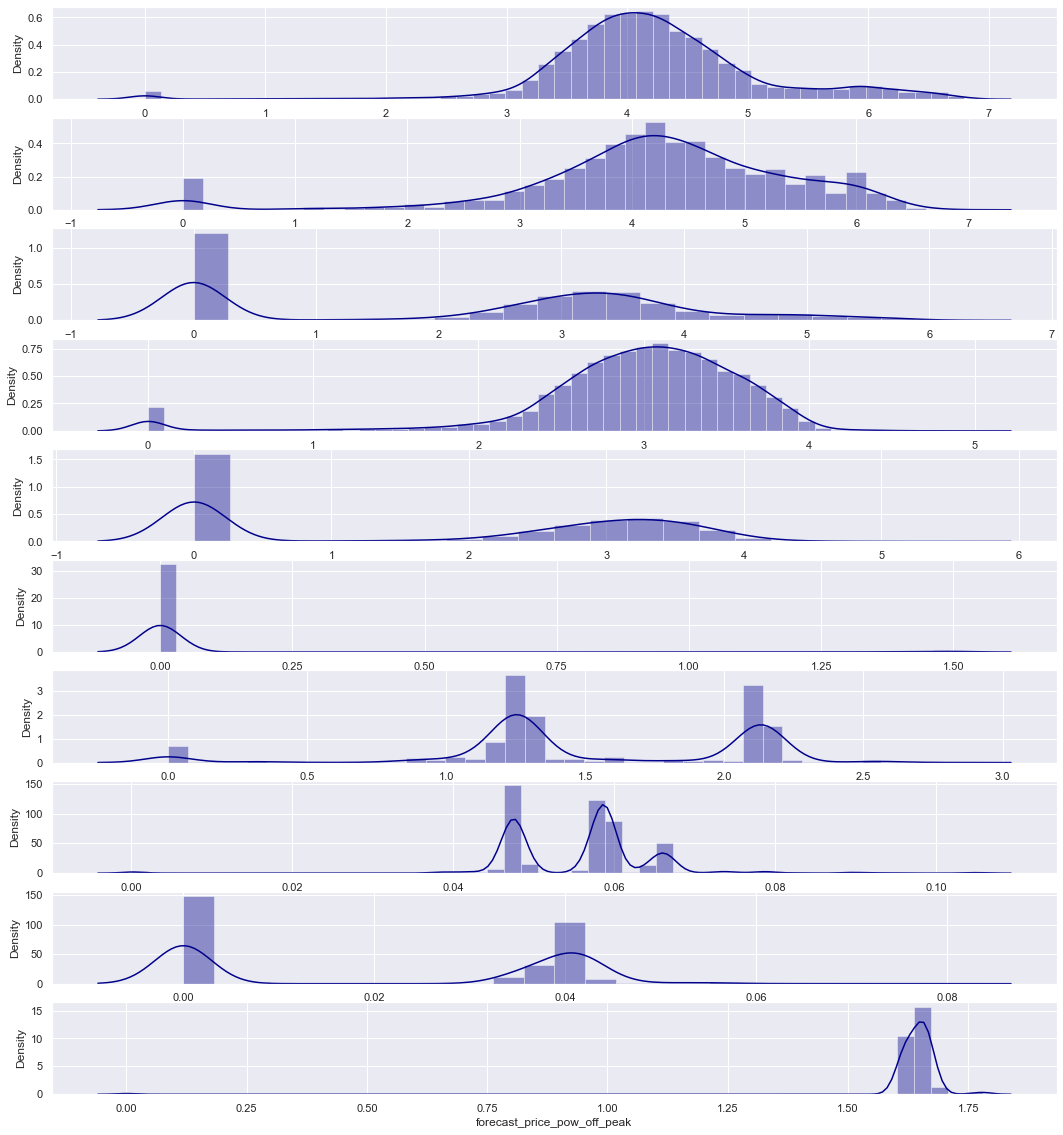

In [73]:
fig, axs = plt.subplots(nrows=10,figsize=(18,20))
sns.distplot((clean_df["cons_12m"].dropna()), ax=axs[0],color='darkblue')
sns.distplot((clean_df[clean_df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1],color='darkblue')
sns.distplot((clean_df["cons_last_month"].dropna()), ax=axs[2],color='darkblue')

sns.distplot((clean_df["forecast_cons_12m"].dropna()), ax=axs[3],color='darkblue')
sns.distplot((clean_df["forecast_cons_year"].dropna()), ax=axs[4],color='darkblue')
sns.distplot((clean_df["forecast_discount_energy"].dropna()), ax=axs[5],color='darkblue')

sns.distplot((clean_df["forecast_meter_rent_12m"].dropna()), ax=axs[6],color='darkblue')
sns.distplot((clean_df["forecast_price_energy_off_peak"].dropna()), ax=axs[7],color='darkblue')
sns.distplot((clean_df["forecast_price_energy_peak"].dropna()), ax=axs[8],color='darkblue')

sns.distplot((clean_df["forecast_price_pow_off_peak"].dropna()), ax=axs[9],color='darkblue')

plt.show()

To have a cleaner, more accurate predictive model;
- Low correlation between independent features.
- High correlation with the target variable (churn).

In [74]:
correlation = clean_df.corr()

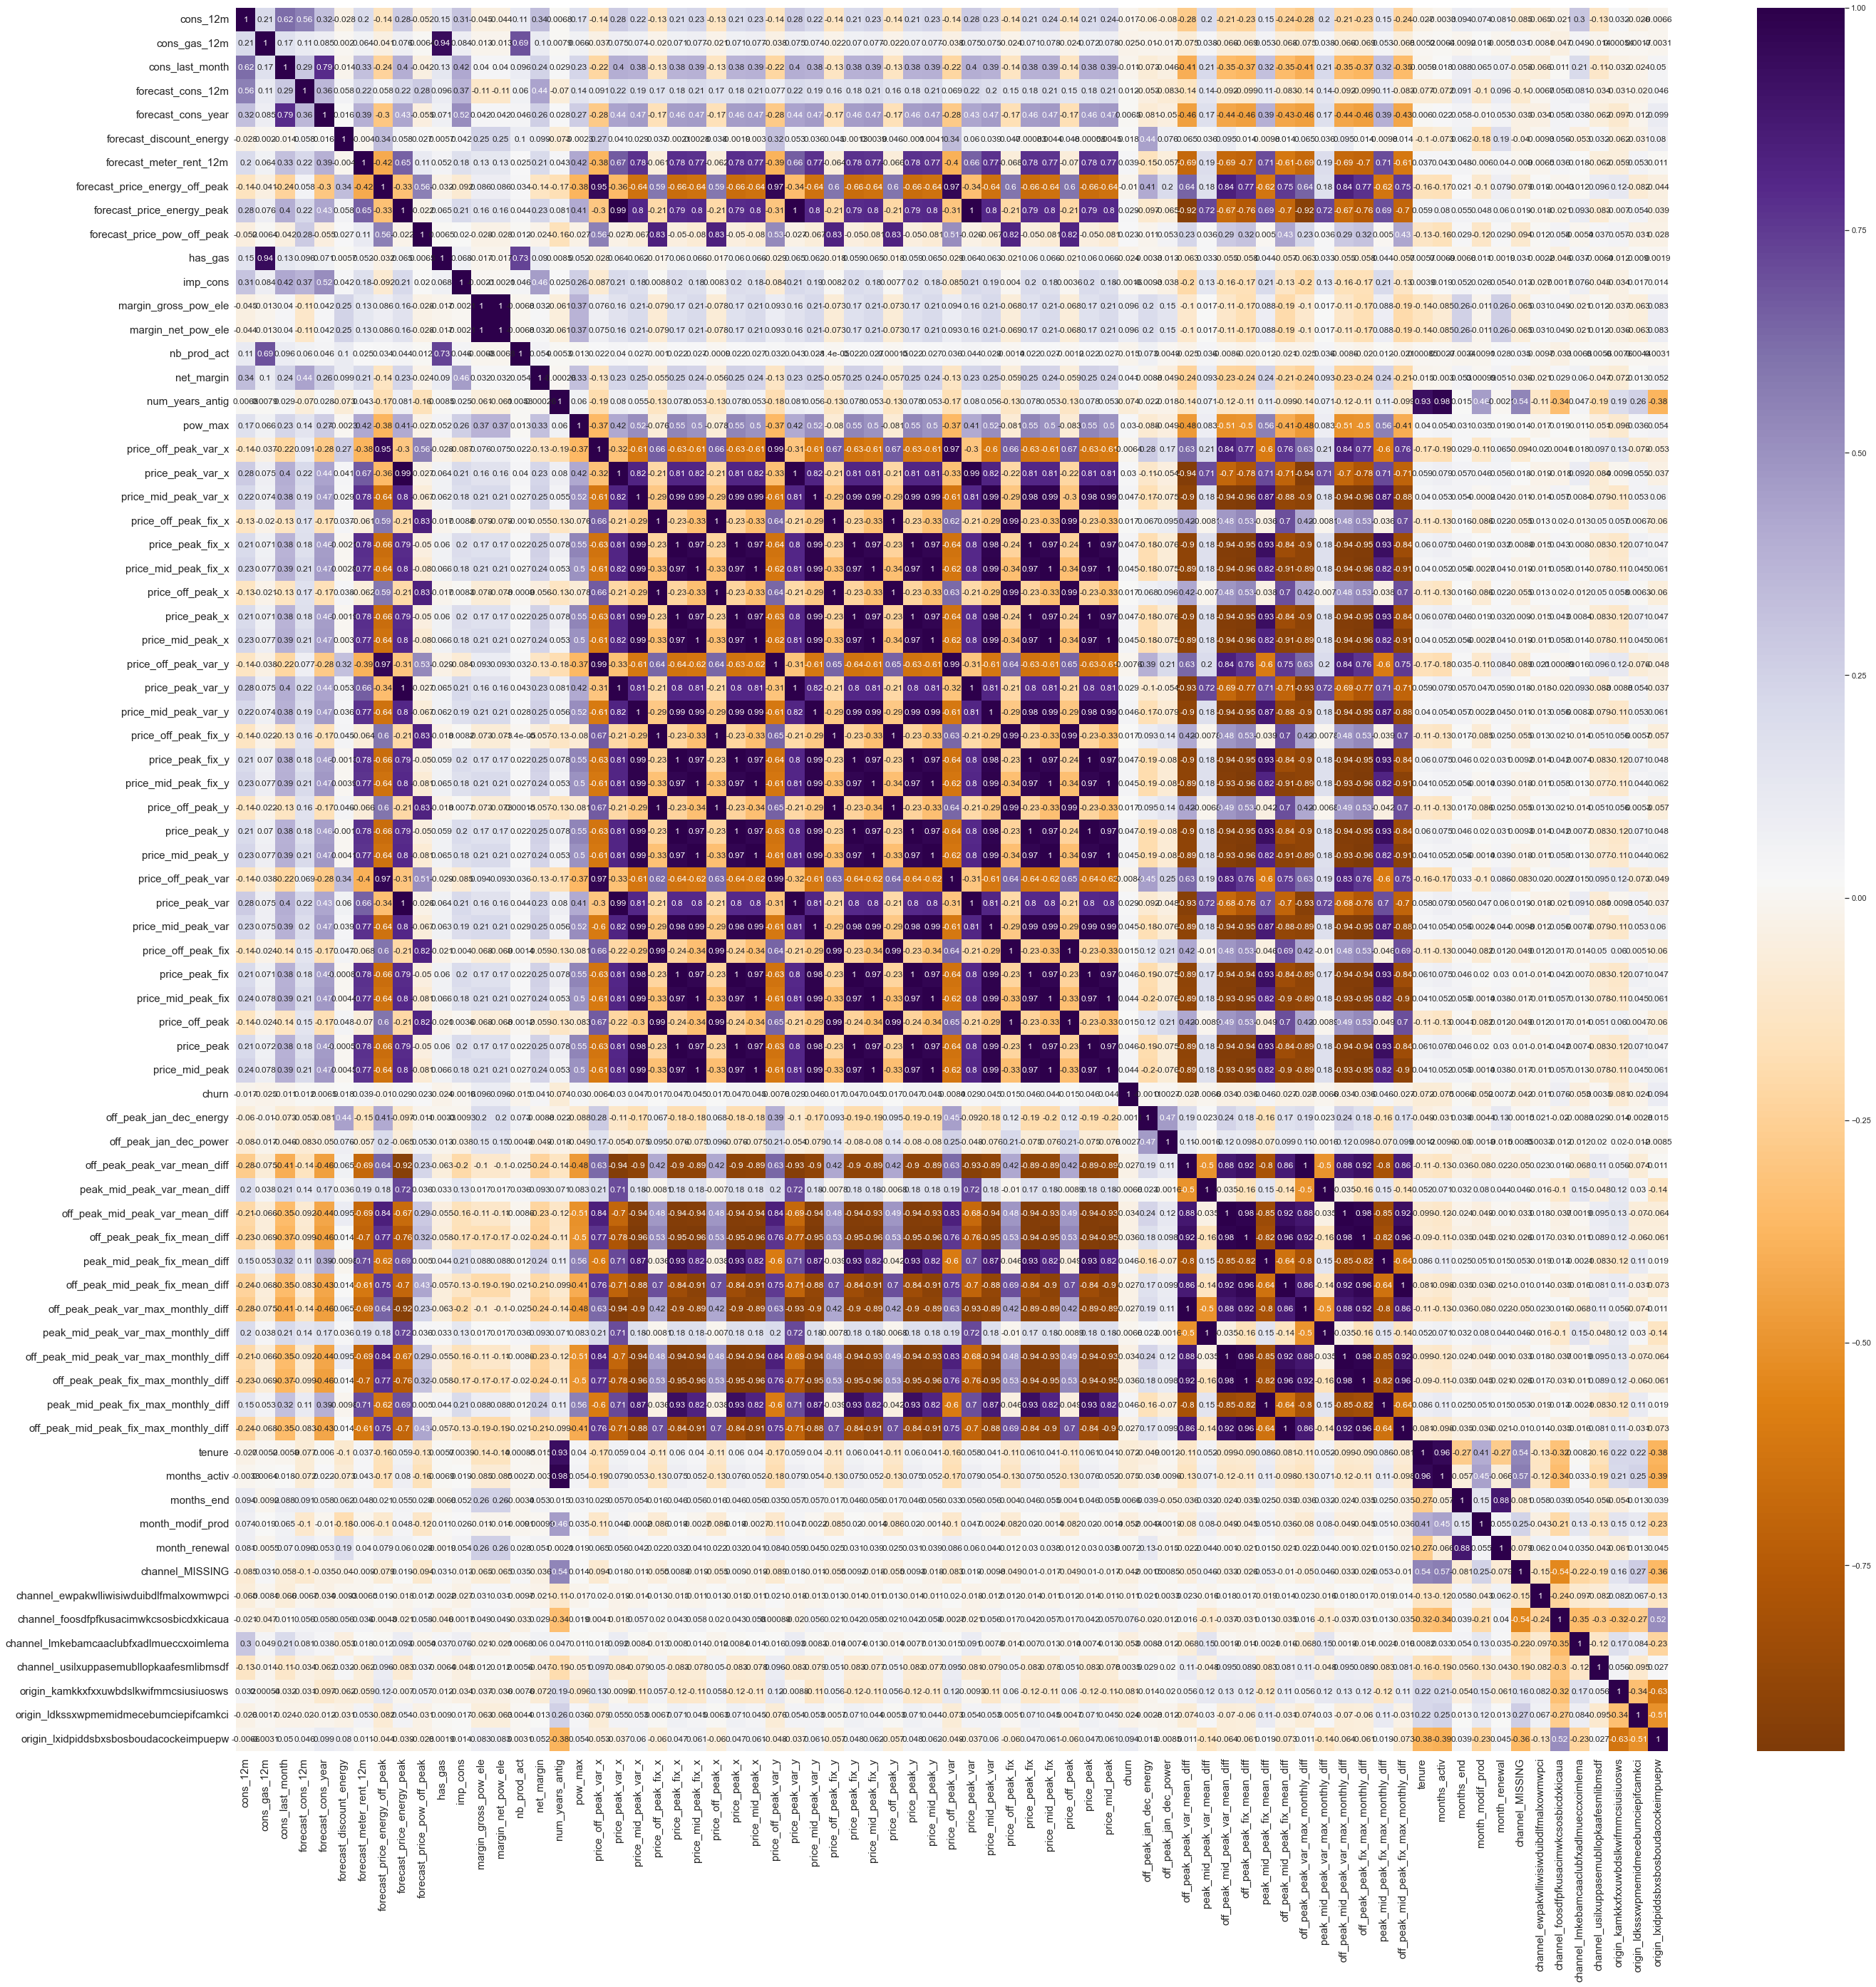

In [75]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12},cmap='PuOr'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [76]:
# Get the correlation values as a DataFrame
corr_values = correlation.stack().reset_index()
corr_values.columns = ['Feature_1', 'Feature_2', 'Correlation']
corr_values.sort_values(by='Correlation',ascending=False)

,Feature_1,Feature_2,Correlation
0,cons_12m,cons_12m,1.000000
1702,price_mid_peak_fix_x,price_mid_peak_fix_x,1.000000
1850,price_peak_x,price_peak_x,1.000000
1924,price_mid_peak_x,price_mid_peak_x,1.000000
1998,price_off_peak_var_y,price_off_peak_var_y,1.000000
...,...,...,...
3746,off_peak_peak_fix_mean_diff,price_mid_peak_fix_x,-0.958882
1949,price_mid_peak_x,off_peak_peak_fix_mean_diff,-0.958906
4187,off_peak_peak_fix_max_monthly_diff,price_mid_peak_x,-0.958906
3749,off_peak_peak_fix_mean_diff,price_mid_peak_x,-0.958906


The two variables(num_years_antig and forecast_cons_year) which exhibit a high correlation with other independent features can be removed.

In [77]:
clean_df = clean_df.drop(columns=['num_years_antig', 'forecast_cons_year'])


## Prediction modelling

### Data sampling

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [79]:
# To make a copy of the data
train_df = clean_df.copy()


In [80]:
x = clean_df.drop(columns=['id','churn'])
# The target/preditction variable
y = clean_df['churn']
print(x.shape)
print(y.shape)

(14605, 70)
(14605,)


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=27)

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10953, 70)
(3652, 70)
(10953,)
(3652,)


### Model training

#### Random forests

In [83]:
random_model = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)


In [84]:
random_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [85]:
y_pred = random_model.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

### Model scores

#### Accuracy

In [87]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9110076670317634


Accuracy score, is misleading. Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

#### Precision

In [88]:
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")

Precision: 0.8148148148148148


Precision score shows a score of 0.82 which is not bad, but could be improved.

#### Recall

In [89]:
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Recall: 0.06432748538011696


Recall shows that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model

#### F1 score

In [90]:
print("F1 Score: ", f1_score(y_test, y_pred))

F1 Score:  0.11924119241192412


#### Confusion matrix

True positives: 22
False positives: 5
True negatives: 3305
False negatives: 320



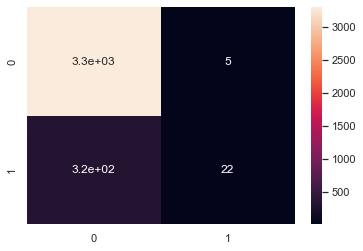

In [91]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)
plt.show()

- The true negatives, we have 3305 out of 3625. This means that out of all the negative cases (churn = 0), we predicted 3305 as negative (hence the name True negative). 
- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 320, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 5 cases.
- With the true positives, we can see that in total we have 342 clients that churned in the test dataset. However, we are only able to correctly identify 22 of those 342, which is very poor.

#### Classification report

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3310
           1       0.81      0.06      0.12       342

    accuracy                           0.91      3652
   macro avg       0.86      0.53      0.54      3652
weighted avg       0.90      0.91      0.88      3652



#### K-Fold Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score

c_score = cross_val_score(random_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross validation scores:{}", format(c_score))

Cross validation scores:{} [0.90506618 0.90826107 0.90597901 0.90639269 0.90684932]


In [95]:
print("Average validation score: {.4f}", format(c_score.mean()))

Average validation score: {.4f} 0.9065096523969997


### Model understanding

In [96]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': random_model.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()

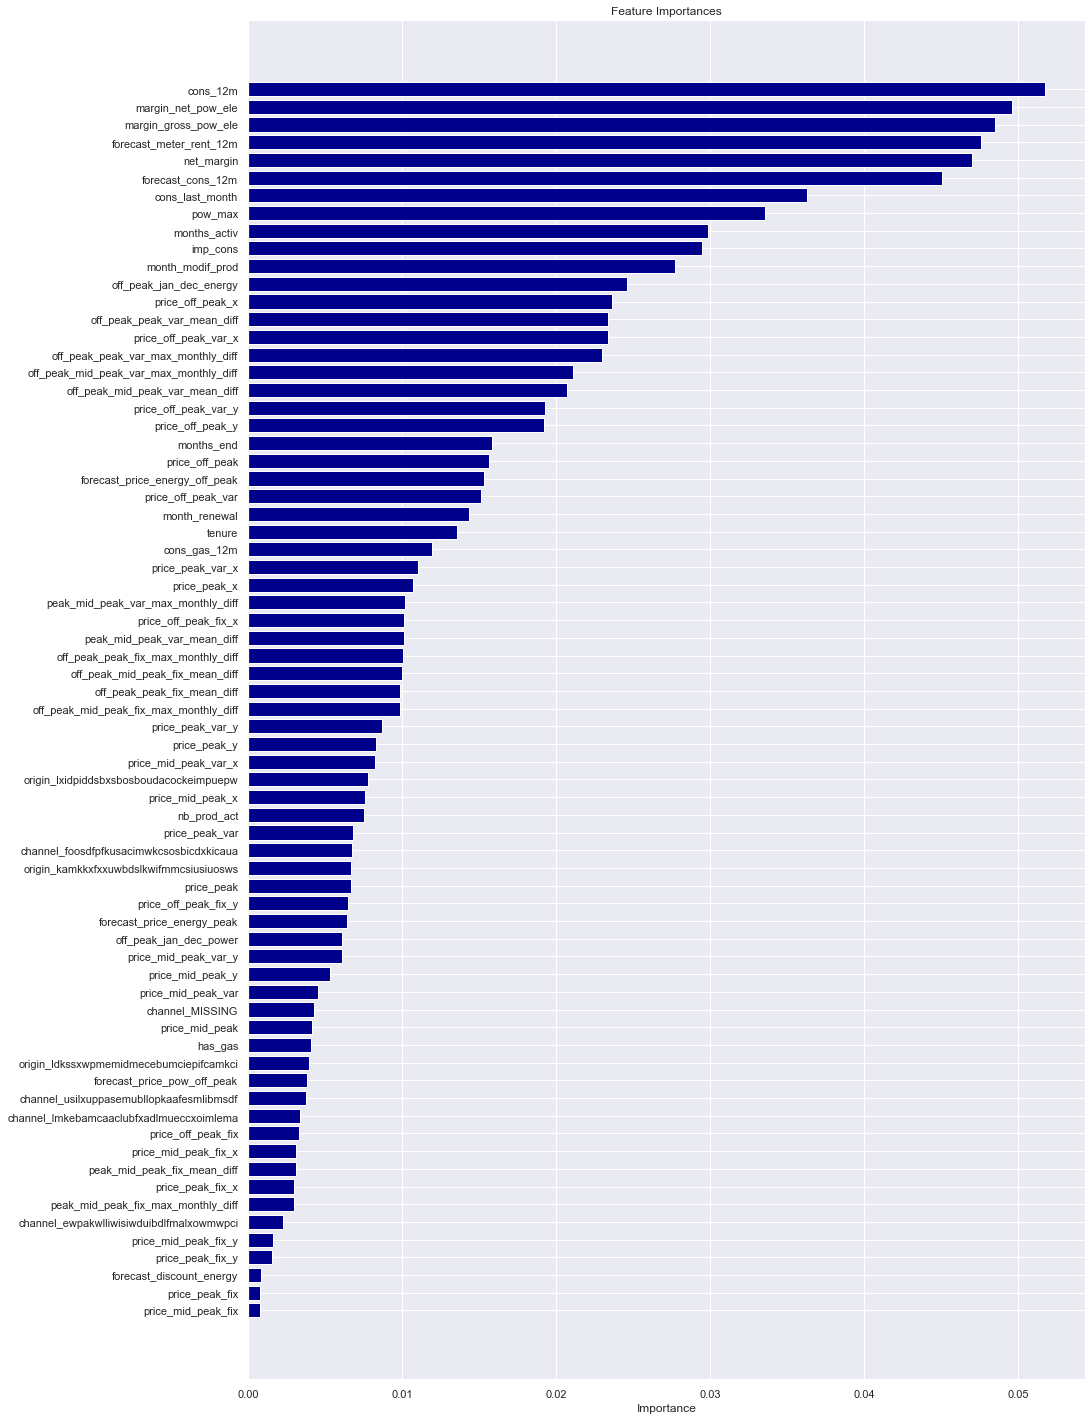

In [97]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='darkblue', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

- Forecasted bill of meter rental for next 2 months, electricity consumption, gross margin on power subscription, net margin on power subscription,  over the past 12 months is a top driver for churn in this model
- The price sensitivity features are not really a top contributor for churn


In [98]:
x_test = x_test.reset_index()
x_test = x_test.drop(columns='index')

In [99]:
x_test

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,month_modif_prod,month_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,6.278678,0.0,5.338496,3.660818,0.000000,1.589615,0.065002,0.035109,1.656207,0,...,67,7,0,0,0,1,0,1,0,0
1,3.943692,0.0,2.866878,3.226577,1.397940,0.000000,0.072955,0.000000,1.679490,0,...,13,1,0,0,1,0,0,0,0,1
2,3.002598,0.0,0.000000,2.185315,0.000000,1.229938,0.059448,0.000000,1.656207,0,...,68,8,1,0,0,0,0,1,0,0
3,4.179063,0.0,2.735599,3.195969,0.000000,2.125546,0.046017,0.040070,1.619163,0,...,1,0,0,0,1,0,0,1,0,0
4,4.366964,0.0,3.275311,3.370385,0.000000,2.154850,0.047343,0.040933,1.619163,0,...,66,6,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,4.576698,0.0,3.118595,3.406641,0.000000,2.125644,0.047343,0.040933,1.619163,0,...,77,4,1,0,0,0,0,0,1,0
3648,4.239475,0.0,2.949878,3.248878,0.000000,2.113609,0.048014,0.041399,1.619163,0,...,58,10,0,0,1,0,0,0,0,1
3649,3.357554,0.0,2.707570,2.523564,0.000000,1.238548,0.057451,0.000000,1.656207,0,...,5,3,0,0,1,0,0,1,0,0
3650,3.323046,0.0,0.000000,2.551657,1.491362,1.313867,0.078492,0.000000,1.674911,0,...,4,11,0,0,0,0,1,1,0,0


In [100]:
y_prob = random_model.predict_proba(x_test)
prob = y_prob[:,1]

In [101]:
x_test['churn'] = y_pred.tolist()
x_test['churn_probability'] = prob.tolist()

In [102]:
x_test.to_csv('predictions_and_probability.csv')

-----------------------------------------

## Business impact of discount

In [103]:
bussiness_data = pd.read_csv('predictions_and_probability.csv')
bussiness_data.drop(bussiness_data.columns[0], axis=1,inplace=True)
bussiness_data.head(5)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,6.278678,0.0,5.338496,3.660818,0.00000,1.589615,0.065002,0.035109,1.656207,0,...,0,0,0,1,0,1,0,0,0,0.003
1,3.943692,0.0,2.866878,3.226577,1.39794,0.000000,0.072955,0.000000,1.679490,0,...,0,0,1,0,0,0,0,1,0,0.118
2,3.002598,0.0,0.000000,2.185315,0.00000,1.229938,0.059448,0.000000,1.656207,0,...,1,0,0,0,0,1,0,0,0,0.057
3,4.179063,0.0,2.735599,3.195969,0.00000,2.125546,0.046017,0.040070,1.619163,0,...,0,0,1,0,0,1,0,0,0,0.115
4,4.366964,0.0,3.275311,3.370385,0.00000,2.154850,0.047343,0.040933,1.619163,0,...,0,0,1,0,0,0,0,1,0,0.126


A base case revenue is calculated which estimates total revenue for each customer for a 12 month period without churn.  consideration. If they churn on January 1st, there’s a 100% loss of revenue.
If they churn on February 29th, there’s a 16.1% contribution to revenue (or 83.9% loss). The average loss over this period is: 91.9% revenue reduction. For customers who churn (churn = 1), the revenue is reduced by 91.9%. For customers who do not churn (churn = 0), no adjustment is made. If a customer leaves later on, the loss will be less. Also, that we had analyzed earlier that, customers with tenure less than 4 months are more likely to leave the company. So taking the averge of 91.9% will work fine.


#### basecase_revenue=(energy_consumption)×(price)+(meter_rent)
forecast_cons_12m * forecast_price_energy_off_peak + forecast_meter_rent_12m

#### basecase_revenue_after_churn=basecase_revenue×(1−0.919×churn)
For lost revenue for churned customers (−91.9% loss on average)


In [104]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
bussiness_data['basecase_revenue'] = (np.power(10, bussiness_data['forecast_cons_12m']) + 1) * bussiness_data['forecast_price_energy_off_peak'] + bussiness_data['forecast_meter_rent_12m']

# Taking churn into account
bussiness_data['basecase_revenue_after_churn'] = bussiness_data['basecase_revenue'] * (1 - 0.919 * bussiness_data['churn'])
# basecase_revenue_after_churn (actual revenue if no discount is given)

In [105]:
bussiness_data.head(5)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,6.278678,0.0,5.338496,3.660818,0.00000,1.589615,0.065002,0.035109,1.656207,0,...,0,1,0,1,0,0,0,0.003,299.331340,299.331340
1,3.943692,0.0,2.866878,3.226577,1.39794,0.000000,0.072955,0.000000,1.679490,0,...,1,0,0,0,0,1,0,0.118,122.996196,122.996196
2,3.002598,0.0,0.000000,2.185315,0.00000,1.229938,0.059448,0.000000,1.656207,0,...,0,0,0,1,0,0,0,0.057,10.397937,10.397937
3,4.179063,0.0,2.735599,3.195969,0.00000,2.125546,0.046017,0.040070,1.619163,0,...,1,0,0,1,0,0,0,0.115,74.428993,74.428993
4,4.366964,0.0,3.275311,3.370385,0.00000,2.154850,0.047343,0.040933,1.619163,0,...,1,0,0,0,0,1,0,0.126,113.282691,113.282691


### Estimating Benefits and Costs of Intervention for Churn Prevention

In this analysis, we will focus on a churn prevention strategy where we offer discounts to customers based on their predicted churn probability. We will assess the effectiveness of this strategy in terms of revenue by calculating the benefits and costs, optimizing the cut-off probability for offering discounts, and exploring whether the cut-off point should be adjusted based on the expected value of customers.

We aim to estimate the impact of offering discounts to customers who are at high risk of churning. The core idea is to prevent churn by reducing prices for those customers. Our task is to evaluate the revenue impact of this intervention and determine the optimal threshold (cut-off probability) for offering the discount.

If a customer’s churn probability is higher than a given cutoff, they receive a discount.

Discount Effects:

- Customers who receive a discount are assumed to have zero churn risk for the next 12 months, as the discount prevents them from leaving.
- The revenue from these customers is reduced to 0.8 * basecase_revenue  being (1-discount_fraction)basecase_revenue (i.e., the original revenue is decreased by the discount fraction).
- Customers who do not receive a discount are assumed to churn according to their observed churn probability. Their revenue is lost entirely.

We will calculate the revenue delta (difference in revenue between the intervention and the base case) as a function of different cutoff probabilities.

1. Base Case:
- The base case represents the scenario where no intervention is made to reduce customer churn. 

In this case:

* Customers churn based solely on their natural behavior or external factors, as observed in the dataset.

Revenue is calculated assuming:

* Customers who churn generate 0 revenue after leaving.
* Customers who do not churn continue generating their full revenue as they did before.



2. Intervention:
The intervention represents the scenario where a strategy is implemented to reduce churn. 

In this specific case:

- The intervention involves offering discounts to customers predicted to have a high likelihood of churning (i.e., above a chosen cutoff probability).

Discount Impact:

- Customers who are given a discount are assumed to have 0% churn probability (i.e., they are fully retained).

No Discount Impact:

- Customers not offered a discount follow the observed churn behavior in the dataset (i.e., they churn or stay based on their actual churn variable).

The revenue difference between the intervention and the base case helps quantify the effectiveness of the intervention:

Revenue Difference = Revenue under Intervention − Revenue under Base Case

If the revenue difference is positive, the intervention is beneficial in financial terms. If it’s negative, the intervention may not be worth implementing, especially if the costs outweigh the benefits.

* For Customers Who Receive a Discount (P_churn > cut_off):

These customers are assumed to not churn after receiving the discount.
However, since they are given a discount, the retained revenue from these customers is reduced. The formula for their revenue is:

Revenue=(1−discount fraction)×basecase_revenue

For example, if the discount fraction is 20%, the revenue becomes 0.8×basecase_revenue.

* For Customers Who Do Not Receive a Discount (P_churn ≤ cut_off):

These customers follow their actual observed churn behavior from the dataset:
- If the observed churn outcome (churn=1), they churn, and their revenue is 0.
- If the observed churn outcome (churn=0), they do not churn, and their revenue is the full base case revenue:

Revenue = basecase_revenue

#### Using probability cutoffs 

In [108]:
# The calculate_revenue_delta Function:
# This function calculates the total revenue delta (difference between intervention revenue and base case revenue) for a given cutoff probability:

def calculate_delta_revenue(data:pd.DataFrame, cut_off: float, discount : float = 0.2) -> float: 
    
        # function's return type will be a float
        #     For customers with churn probability ≥ cutoff, adjust their revenue: 
        # Adjusted Revenue=(1−discount)×Base Case Revenue
        data['discounted_revenue'] = data['basecase_revenue_after_churn']
        # revenue without offering any discounts
        # This serves as the "base case" scenario for customers who do not qualify for a discount.
        
        # Customers with a high predicted churn probability (churn_probability >= cutoff) 
        # and sufficiently high revenue (basecase_revenue > min_rev) are offered a discount to retain them
        data.loc[(data['churn_probability']>cut_off),'discounted_revenue'] = data['basecase_revenue'] *(1-discount)
        
        data['revenue_diff'] = data['discounted_revenue'] - data['basecase_revenue_after_churn']
        return data['revenue_diff'].sum()
        # Revenue Delta = Adjusted Revenue−Base Case Revenue After Churn

- The cutoff defines the churn probability threshold for offering discounts.

- The min_rev ensures that discounts are only given to "high-value" customers, minimizing revenue loss from offering unnecessary discounts to low-revenue customers.

In [109]:
get_rev_deltas = pd.Series({cut_off : calculate_delta_revenue(bussiness_data, cut_off = cut_off) for cut_off in np.arange(0,1,0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas

def plot_tradeoff(get_rev_deltas):
    get_rev_deltas.plot(color='darkblue')
    max_value = get_rev_deltas.idxmax()
    plt.scatter(max_value, get_rev_deltas.loc[max_value], color='red')
    plt.show()
    print(f"The maximum rev delta is for the cutoff, {max_value} for a revenue value of {get_rev_deltas.loc[max_value]:,.2f}")
    

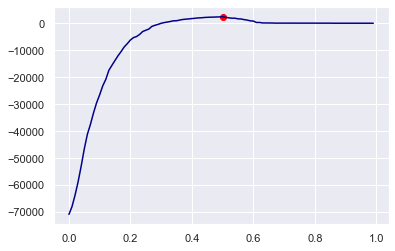

The maximum rev delta is for the cutoff, 0.5 for a revenue value of 2,429.57


In [110]:
plot_tradeoff(get_rev_deltas)

Valid for high churn + high revenue: The cutoff of 0.5 indicates that we are targeting customers who have a high probability of churning (since it's close to the typical "high-risk" threshold). If these customers are associated with a revenue value of 2,429.57, this aligns with the goal of identifying high-value customers with a high probability of churn.

#### Using cutoffs and minimum revenue

The probability cut-off strategy for offering discounts may not always be optimal, as it can retain unprofitable customers and worsen margins. While prioritizing high-value customers is generally effective, in this case, targeting large-revenue customers is less beneficial because the overall revenue delta is lower when focusing solely on price adjustments. However, interventions often go beyond price adjustments, such as adding key account managers or intensifying customer relations, which incur costs. In such cases, targeting a subset of customers can reduce costs while still maintaining an effective strategy, even if the overall revenue delta decreases. Balancing retention efforts with profitability ensures better outcomes.

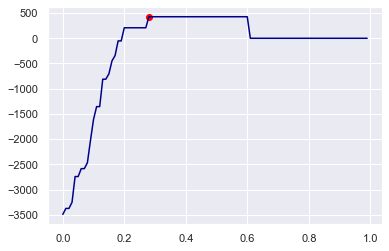

The maximum rev delta is for the cutoff, 0.28 for a revenue value of 427.02


In [111]:
def get_rev_delta_redefined(pred: pd.DataFrame, cut_off: float=0.5, discount: float=0.2, min_rev: float=500):
    pred['discount_revenue_new'] = pred['basecase_revenue_after_churn']
    pred.loc[(pred['churn_probability'] >= cut_off) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue_new'] = pred['basecase_revenue'] * (1 - discount)
    pred['revenue_delta_new'] = pred['discount_revenue_new'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta_new'].sum()

get_rev_deltas_new = pd.Series({cut_off : get_rev_delta_redefined(bussiness_data, cut_off = cut_off) for cut_off in np.arange(0,1,0.01)})

plot_tradeoff(get_rev_deltas_new)

A cutoff of 0.28 is relatively low and would likely result in a larger pool of customers, many of whom may have a low probability of churning. The associated revenue of 427.02 seems much lower, which suggests that we are including many customers who are less at risk of churning. This cutoff is less ideal for targeting high-risk, high-revenue customers, as it might bring in more lower-revenue, low-churn-risk customers. 

#### Using forecast rather than actual churn

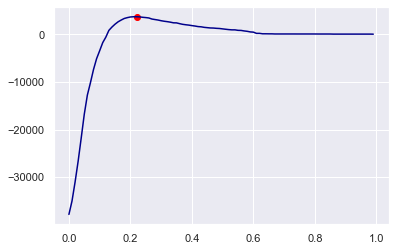

The maximum rev delta is for the cutoff, 0.22 for a revenue value of 3,672.71


In [112]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

bussiness_data['basecase_revenue'] = np.power(10, bussiness_data['forecast_cons_12m']) * bussiness_data['forecast_price_energy_off_peak'] + bussiness_data['forecast_meter_rent_12m']
# Taking churn into account
bussiness_data['basecase_revenue_after_churn'] = bussiness_data['basecase_revenue'] * (1 - 0.919 * bussiness_data['churn_probability'])
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_fore = pd.Series({cut_off: calculate_delta_revenue(bussiness_data, cut_off=cut_off) for cut_off in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas_fore)

A cutoff of 0.22 is quite low, and we are capturing more customers who are less likely to churn (since it's a lower cutoff). However, the higher revenue value suggests that some high-revenue customers who were forecasted to stay (despite the low churn probability) are included in this segment. While this may seem beneficial in terms of revenue, it doesn't align with the ideal case, where we want high-churn-risk customers with high revenue. This result may not be ideal unless we're specifically trying to forecast the retention of high-revenue customers, even at a lower risk of churning.

To effectively retain high-value customers and reduce churn, leveraging forecasted churn probabilities and optimized cutoff thresholds is essential. By utilizing forecasted churn probabilities, we can predict which customers are most likely to leave, even before they take action. Setting calibrated cutoff thresholds allows us to segment customers based on their likelihood of churning, enabling a more targeted approach. This strategy helps prioritize customers who not only have a high probability of churning but also contribute significantly to the company’s revenue. By focusing retention efforts on this group, we can maximize revenue retention. Furthermore, by avoiding unnecessary discounting for customers who are less likely to churn, the company can save costs and allocate resources more efficiently, ensuring that retention strategies are both effective and cost-effective. This approach allows for a more data-driven, strategic retention plan that aligns with the company’s broader financial goals.

----------------------------------------------------------

Done and submitted by Aswathi Ajith